In [1]:
#!pip install prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from prophet import Prophet

In [2]:
df = pd.read_csv("covid_19.csv")

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
df.describe()

Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#Renaming the columns for ease of access

df = df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat",
                   "Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "Active":"active",
                   "WHO Region":"region"})

In [8]:
df

state                country        lat       long       date  \
0       NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1       NaN                Albania  41.153300  20.168300 2020-01-22   
2       NaN                Algeria  28.033900   1.659600 2020-01-22   
3       NaN                Andorra  42.506300   1.521800 2020-01-22   
4       NaN                 Angola -11.202700  17.873900 2020-01-22   
...     ...                    ...        ...        ...        ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065   NaN                Comoros -11.645500  43.333300 2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600 2020-07-27   

       confirmed  deaths  recovered  active                 region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [9]:
df.sample(5)

state         country        lat        long  \
14085  Falkland Islands (Malvinas)  United Kingdom -51.796300  -59.523600   
11674                          NaN    Saudi Arabia  23.885942   45.079162   
20928                        Anhui           China  31.825700  117.226400   
20241                          NaN          Latvia  56.879600   24.603200   
35032                 Heilongjiang           China  47.862000  127.761500   

            date  confirmed  deaths  recovered  active                 region  
14085 2020-03-15          0       0          0       0                 Europe  
11674 2020-03-06          5       0          0       5  Eastern Mediterranean  
20928 2020-04-11        991       6        984       1        Western Pacific  
20241 2020-04-08        577       2         16     559                 Europe  
35032 2020-06-04        947      13        934       0        Western Pacific

In [10]:
#checking for duplicates
df.duplicated(subset=['country']).sum()

48881

In [11]:
df['country'].value_counts()

China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: country, Length: 187, dtype: int64

In [12]:
#Creating a dataframe for most recent cases.
top = df[df['date']==df['date'].max()]
top

state                country        lat       long       date  \
48807   NaN            Afghanistan  33.939110  67.709953 2020-07-27   
48808   NaN                Albania  41.153300  20.168300 2020-07-27   
48809   NaN                Algeria  28.033900   1.659600 2020-07-27   
48810   NaN                Andorra  42.506300   1.521800 2020-07-27   
48811   NaN                 Angola -11.202700  17.873900 2020-07-27   
...     ...                    ...        ...        ...        ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065   NaN                Comoros -11.645500  43.333300 2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600 2020-07-27   

       confirmed  deaths  recovered  active                 region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [13]:
#Creating a countrywise dataframe 
world=top.groupby("country").sum()[["confirmed","deaths","recovered","active"]].reset_index()
world

country  confirmed  deaths  recovered  active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

In [14]:
world.duplicated().sum()

0

In [15]:
fig=px.choropleth(world,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,15000],color_continuous_scale="greens",title='Countries with Active cases')
fig.show()

In [16]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="deaths",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="peach",
                       title="Countries with deaths Cases")
figure.show()

In [17]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="recovered",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="sunset",
                       title="Countries with recovered Cases")
figure.show()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

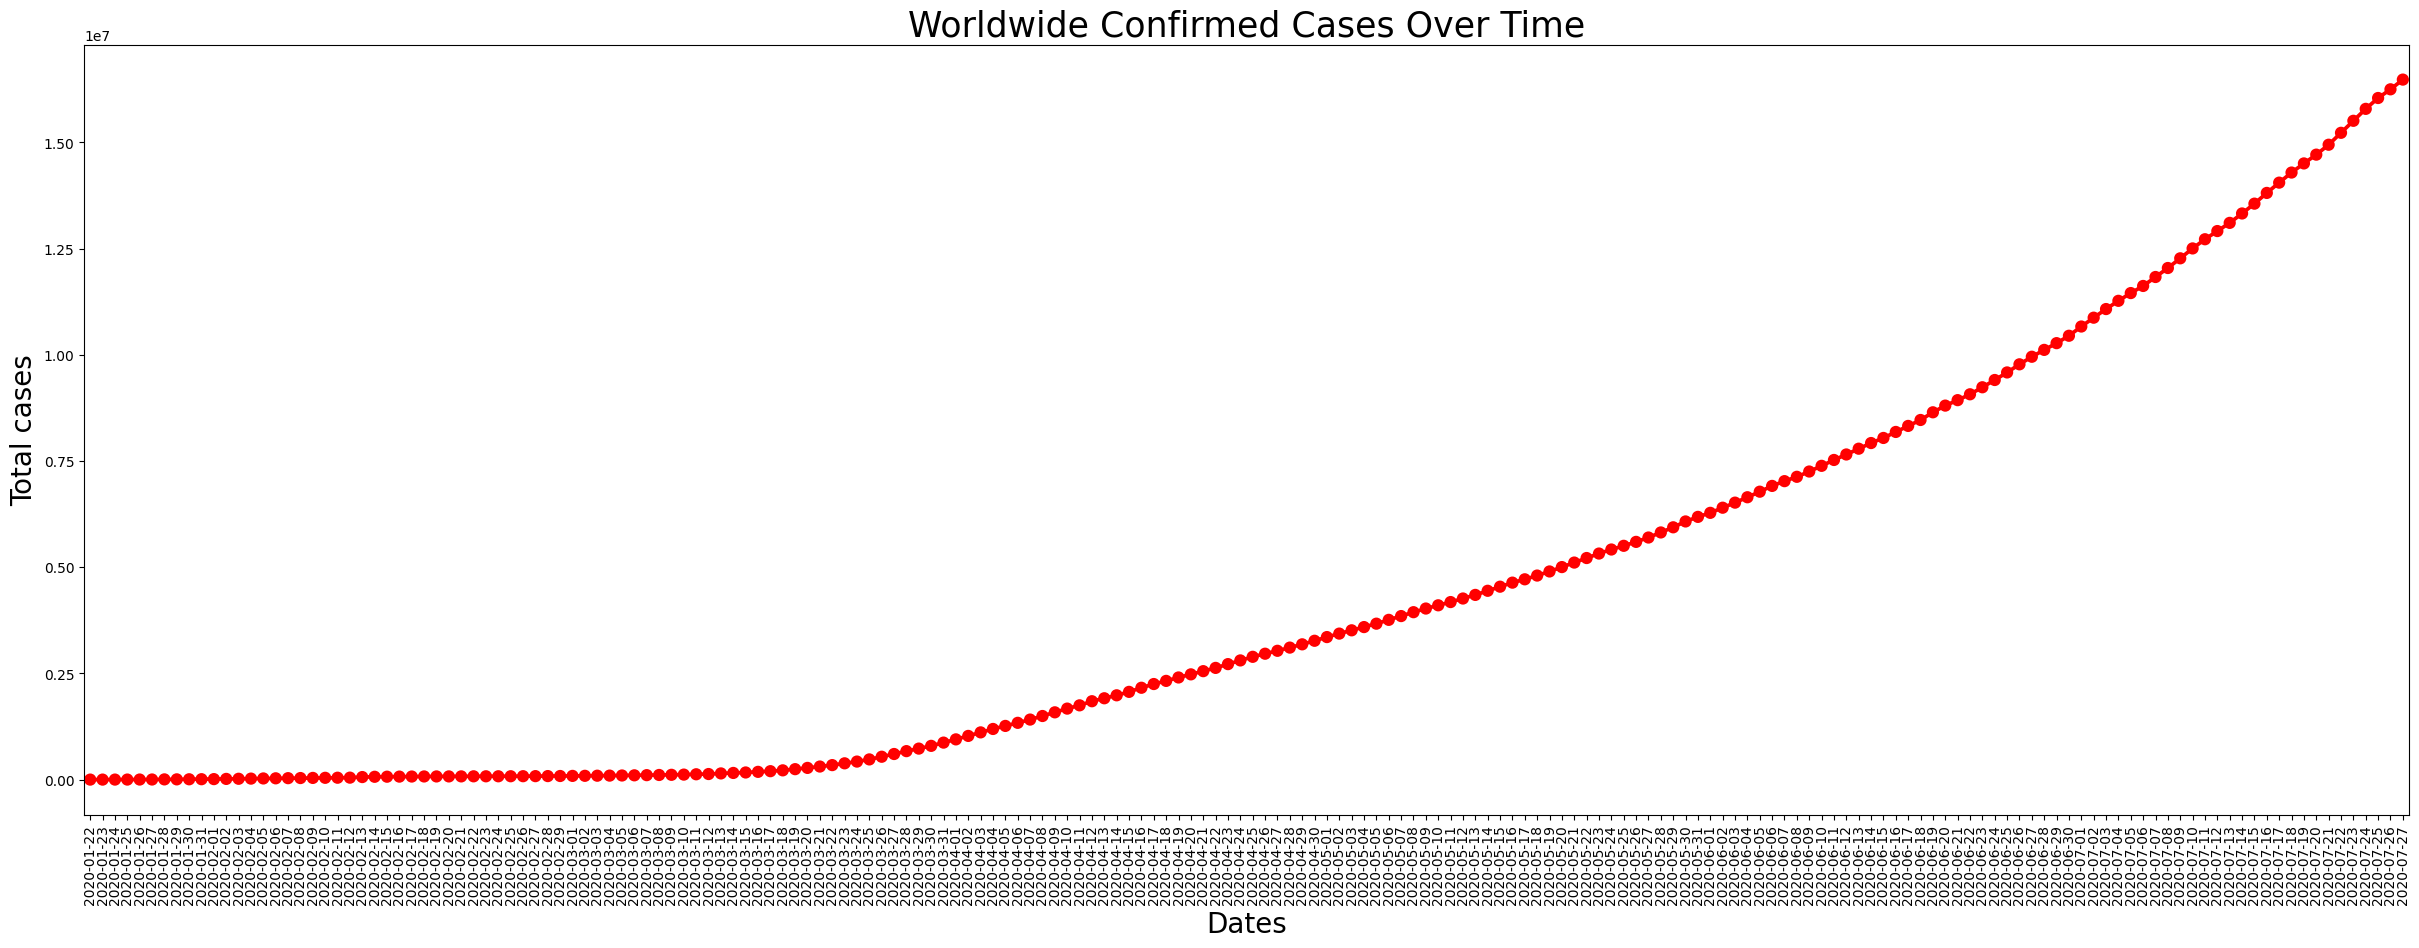

In [18]:
#Trend of Pandemic spread

plt.figure(figsize=(30,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=20)
plt.ylabel("Total cases",fontsize=20)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=25)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
#total_cases
ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [19]:
fig = px.line(total_cases, x=total_cases.date.dt.date, y=total_cases.confirmed,hover_name='confirmed',
              title='Worldwide Confirmed Cases Over Time',width=1000, height=350)
fig.show()

### The above graph shows that the pandemic was an exponential growth.

In [20]:
# Top 20 death cases as per country
top20_deaths =df.groupby("country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top20_deaths

country    deaths
0               US  11011411
1   United Kingdom   3997775
2           Brazil   3938034
3            Italy   3707717
4           France   3048524
5            Spain   3033030
6           Mexico   1728277
7            India   1111831
8             Iran   1024136
9          Belgium    963679
10         Germany    871322
11          Canada    699566
12           China    672413
13            Peru    652113
14     Netherlands    622314
15          Russia    619385
16          Turkey    466056
17          Sweden    448913
18         Ecuador    346618
19           Chile    322480

In [21]:
fig = px.bar(top20_deaths, x='deaths', y='country'
             ,orientation='h',title='Top 20 countries having most death cases',color='country')
fig.show()

In [75]:
# Top 20 active cases
top20_actives =df.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()

In [76]:
fig = px.bar(top20_actives, x='active', y='country'
             ,orientation='h',title='Top 20 countries having most active cases',color='country')
fig.show()

In [44]:
#Top 20 confirmed case.
top20_confirmed =df.groupby("country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()

In [79]:
fig = px.bar(top20_confirmed, x='confirmed', y='country'
             ,orientation='h',title='Top 20 countries having most confirmed cases',color='country')
fig.show()

In [45]:
#Top 20 recovered cases.
top20_recovered =df.groupby("country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()

In [80]:
fig = px.bar(top20_recovered, x='recovered', y='country'
             ,orientation='h',title='Top 20 countries having most confirmed cases',color='country')
fig.show()

In [82]:
# Top 5 countries having highest active cases are :

top5_actives =df.groupby("country")["active"].sum().sort_values(ascending=False).head(5).reset_index()
top5_actives

country     active
0              US  156981121
1          Brazil   31094060
2  United Kingdom   22624595
3          Russia   19668578
4           India   15987913

In [83]:
# US dataframe
US = df[df.country=="US"]
US = US.groupby("date")["recovered","deaths","confirmed","active"].sum().reset_index()
US

date  recovered  deaths  confirmed   active
0   2020-01-22          0       0          1        1
1   2020-01-23          0       0          1        1
2   2020-01-24          0       0          2        2
3   2020-01-25          0       0          2        2
4   2020-01-26          0       0          5        5
..         ...        ...     ...        ...      ...
183 2020-07-23    1233269  144430    4038816  2661117
184 2020-07-24    1261624  145560    4112531  2705347
185 2020-07-25    1279414  146465    4178970  2753091
186 2020-07-26    1297863  146935    4233923  2789125
187 2020-07-27    1325804  148011    4290259  2816444

[188 rows x 5 columns]

In [84]:
# Brazil dataframe
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby("date")["recovered","deaths","confirmed","active"].sum().reset_index()
Brazil

date  recovered  deaths  confirmed  active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23    1620313   84082    2287475  583080
184 2020-07-24    1693214   85238    2343366  564914
185 2020-07-25    1785359   86449    2394513  522705
186 2020-07-26    1812913   87004    2419091  519174
187 2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

In [85]:
# UK dataframe
UK = df[df.country=="United Kingdom"]
UK = UK.groupby("date")["recovered","deaths","confirmed","active"].sum().reset_index()
UK

date  recovered  deaths  confirmed  active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23       1425   45639     298731  251667
184 2020-07-24       1425   45762     299500  252313
185 2020-07-25       1427   45823     300270  253020
186 2020-07-26       1434   45837     301020  253749
187 2020-07-27       1437   45844     301708  254427

[188 rows x 5 columns]

In [86]:
# Russia dataframe
Russia =df[df.country=="Russia"]
Russia = Russia.groupby("date")["recovered","deaths","confirmed","active"].sum().reset_index()

In [95]:
# India dataframe
India= df[df.country=="India"]
India = India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

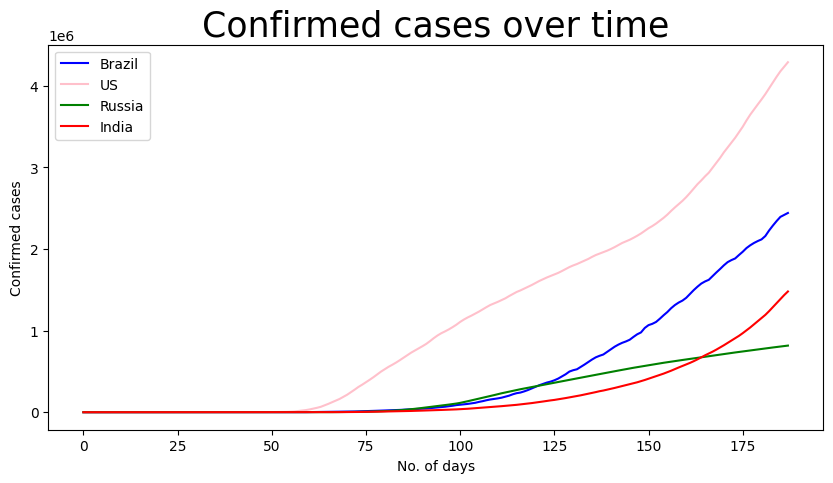

In [98]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=Brazil, x=Brazil.index, y='confirmed', color="Blue", label="Brazil")
sns.lineplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.lineplot(data=Russia, x=Russia.index, y='confirmed', color="Green", label="Russia")
sns.lineplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=10)
plt.ylabel('Confirmed cases', fontsize=10)
plt.title('Confirmed cases over time', fontsize=25)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

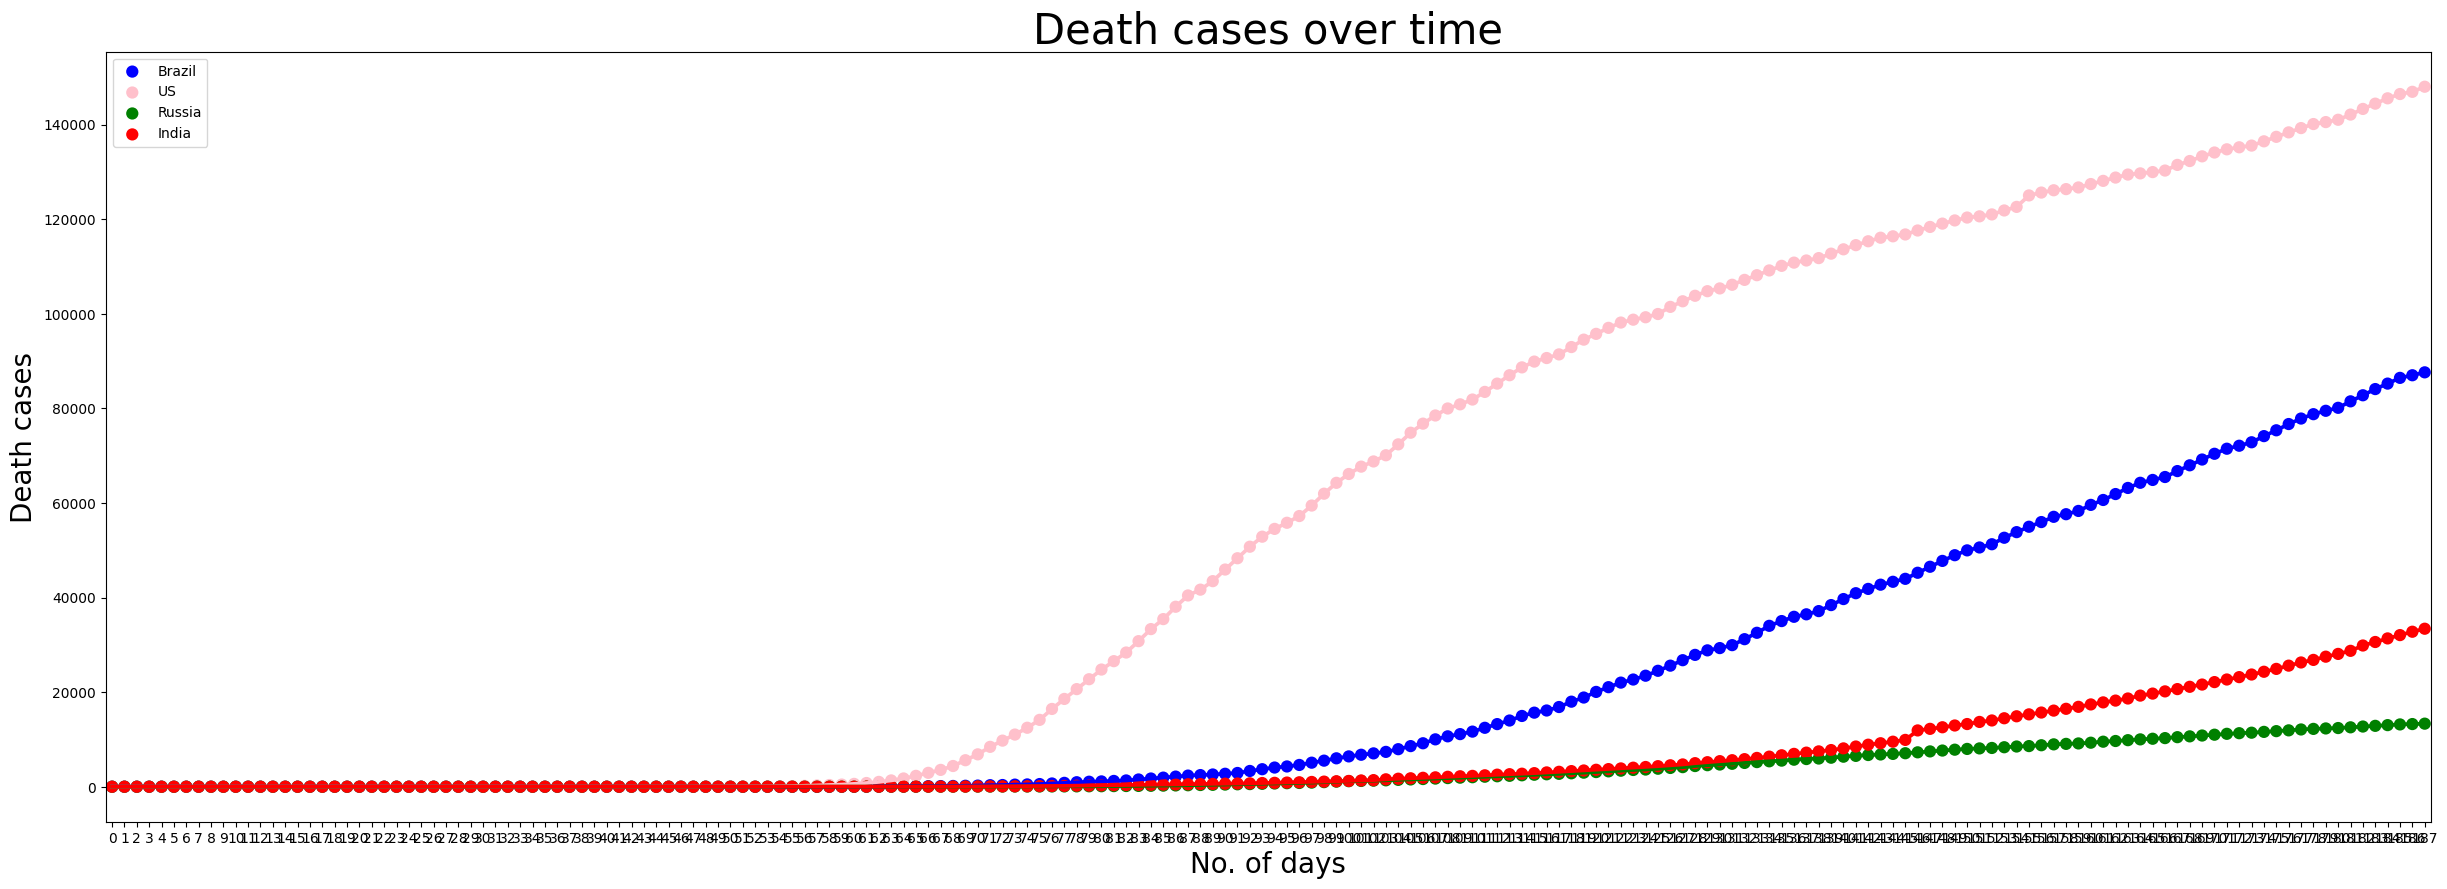

In [35]:
plt.figure(figsize=(30, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Blue",label='Brazil')
sns.pointplot(x=US.index, y=US.deaths, color="Pink",label='US')
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green",label='Russia')
sns.pointplot(x=India.index, y=India.deaths, color="Red",label='India')

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

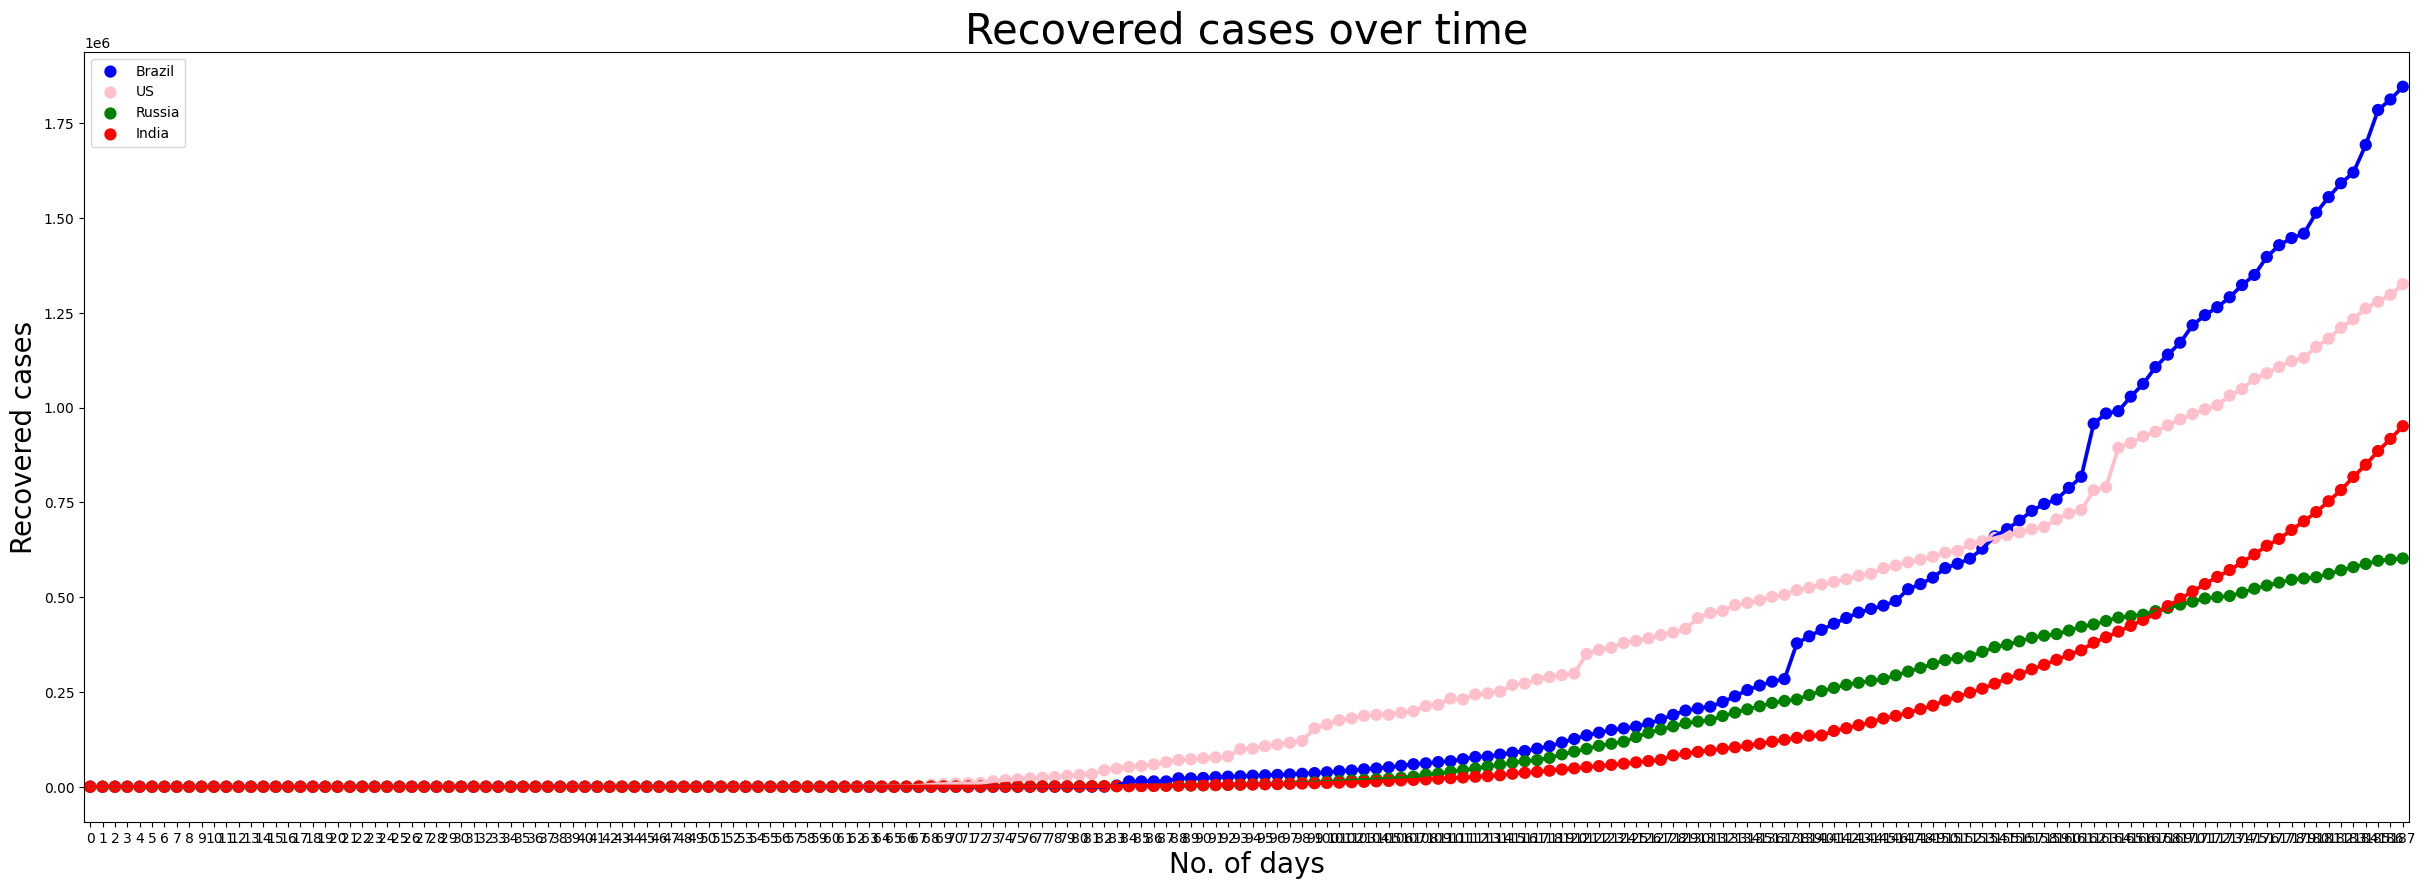

In [36]:
plt.figure(figsize=(30, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color="Blue", label="Brazil")
sns.pointplot(x=US.index, y=US.recovered, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.recovered, color="Green", label="Russia")
sns.pointplot(x=India.index, y=India.recovered, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

# Forecasting using FBPROPHET

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      14664 non-null  object        
 1   country    49068 non-null  object        
 2   lat        49068 non-null  float64       
 3   long       49068 non-null  float64       
 4   date       49068 non-null  datetime64[ns]
 5   confirmed  49068 non-null  int64         
 6   deaths     49068 non-null  int64         
 7   recovered  49068 non-null  int64         
 8   active     49068 non-null  int64         
 9   region     49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [114]:
#Creating Dataframe for confirmed cases.
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
confirmed

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [115]:
#Creating Dataframe for death cases.
deaths=df.groupby("date").sum()["deaths"].reset_index()
deaths

date  deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [116]:
#Creating Dataframe for recovered cases.
recovered=df.groupby("date").sum()["recovered"].reset_index()
recovered

date  recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [117]:
#Creating Dataframe for active cases.
active=df.groupby("date").sum()["active"].reset_index()
active

date   active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [118]:
#Prediction for confirmed Dataframe.


In [119]:
confirmed

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [120]:
#renaming column name
confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [121]:
confirmed.tail()

ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

In [122]:
con_model=Prophet(interval_width=0.95)

In [123]:
con_model.fit(confirmed)

23:03:11 - cmdstanpy - INFO - Chain [1] start processing
23:03:11 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
future=con_model.make_future_dataframe(periods=7)

In [125]:
future.tail(7)

ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [126]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632401e+07  1.614593e+07  1.647435e+07
189 2020-07-29  1.653405e+07  1.637879e+07  1.668919e+07
190 2020-07-30  1.674820e+07  1.659219e+07  1.690723e+07
191 2020-07-31  1.696362e+07  1.679801e+07  1.713261e+07
192 2020-08-01  1.717143e+07  1.701261e+07  1.734153e+07
193 2020-08-02  1.736922e+07  1.720138e+07  1.754464e+07
194 2020-08-03  1.756410e+07  1.739743e+07  1.774677e+07

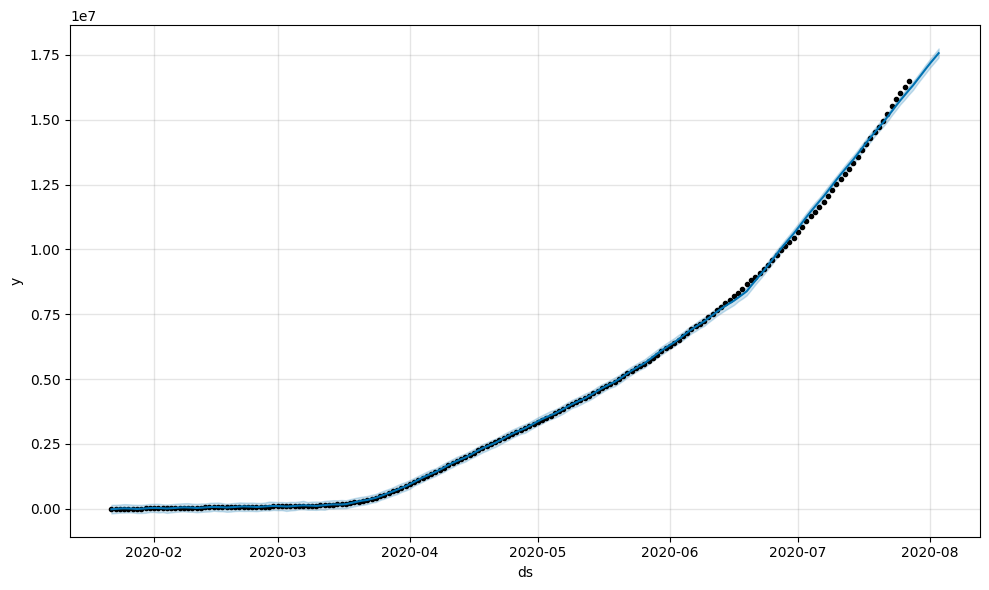

In [127]:
confirmed_plot=con_model.plot(forecast)

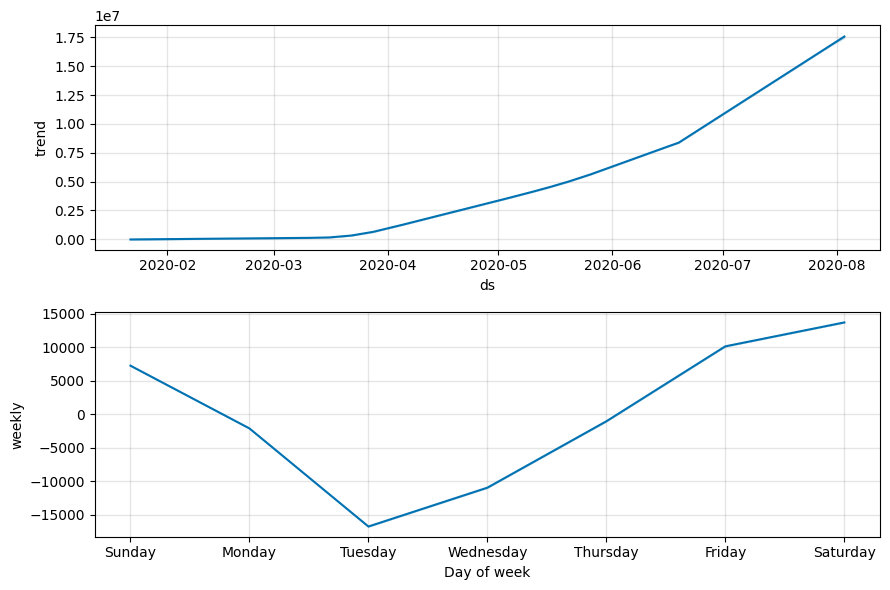

In [128]:
confirmed_forecast_plot1 = con_model.plot_components(forecast)

In [129]:
#Forecast on death cases:

In [130]:
deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)

In [131]:
death_model=Prophet(interval_width=0.95)

In [132]:
death_model.fit(deaths)

23:04:11 - cmdstanpy - INFO - Chain [1] start processing
23:04:11 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
future=death_model.make_future_dataframe(periods=7)

In [134]:
future=death_model.make_future_dataframe(periods=7)

In [135]:
forecast=death_model.predict(future)

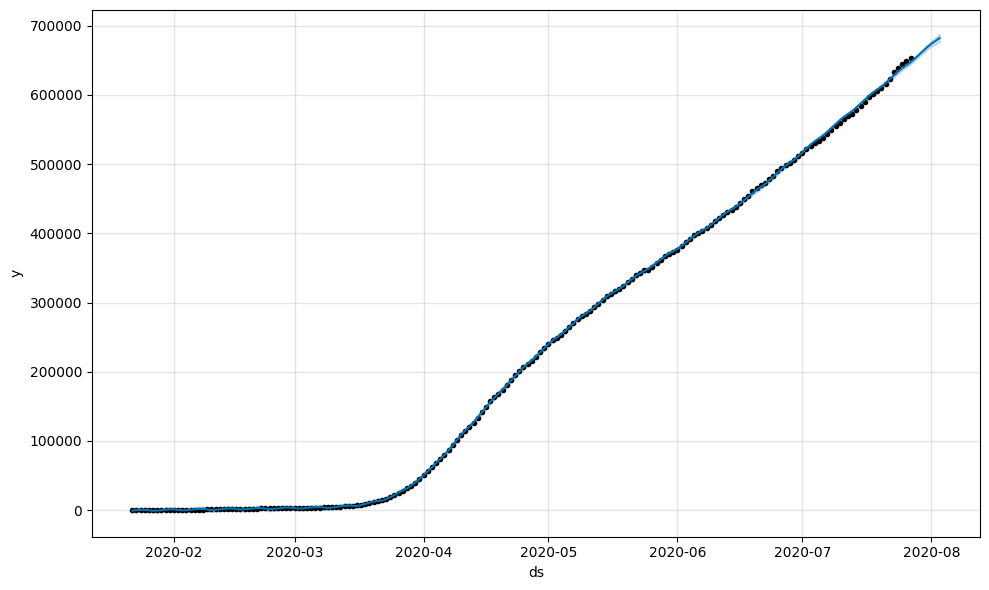

In [136]:
death_plot=death_model.plot(forecast)

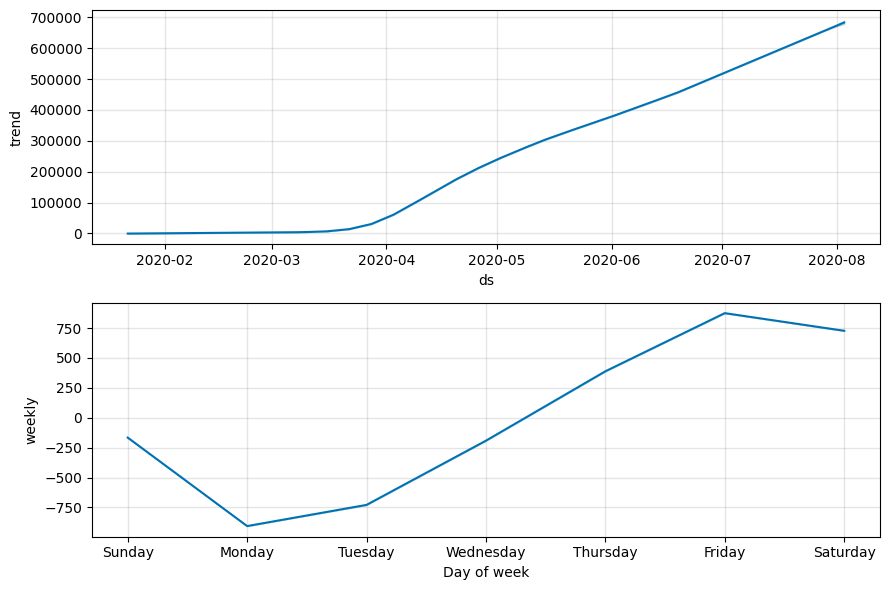

In [137]:
death_forecast_plot1 = death_model.plot_components(forecast)

In [138]:
#forecasting for Recovered

In [139]:
recovered

date  recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [140]:
recovered.rename(columns={"date":"ds","recovered":"y"},inplace=True)
recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [141]:
recovered_model=Prophet(interval_width=0.95)

In [142]:
recovered_model.fit(recovered)

23:05:39 - cmdstanpy - INFO - Chain [1] start processing
23:05:39 - cmdstanpy - INFO - Chain [1] done processing


In [143]:
future = recovered_model.make_future_dataframe(periods=7)

In [144]:
forecast=recovered_model.predict(future)

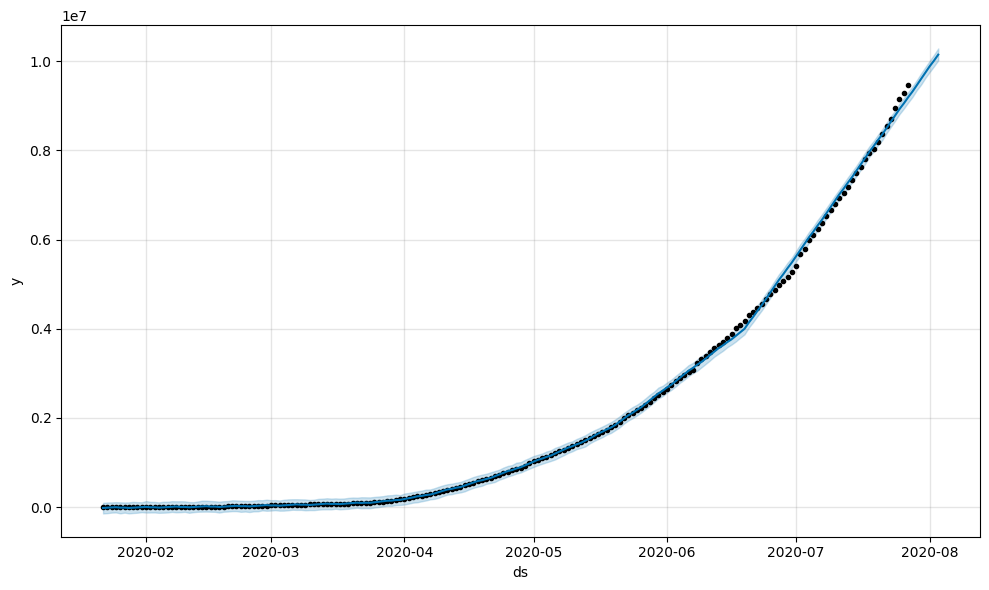

In [145]:
recovered_plot=recovered_model.plot(forecast)

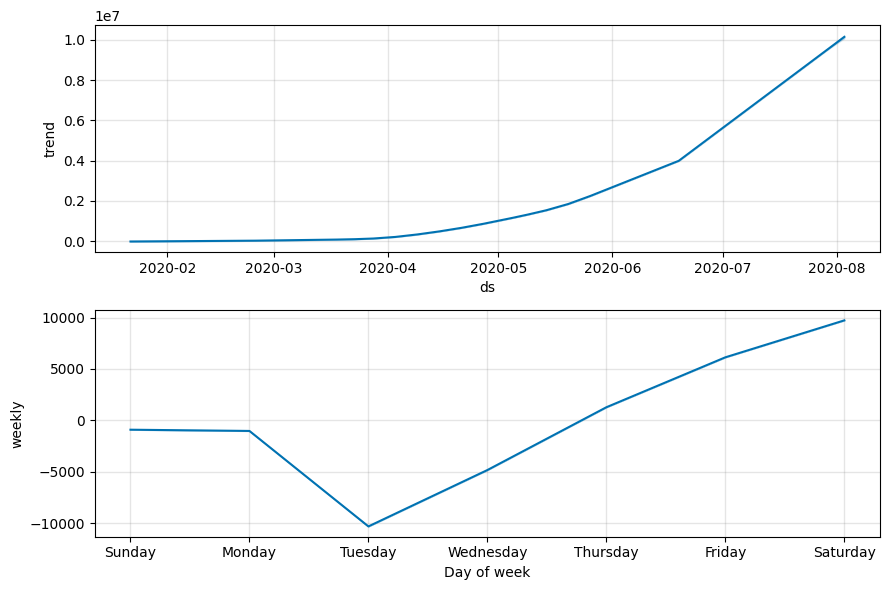

In [146]:
recovered_forecast_plot1 = recovered_model.plot_components(forecast)

In [147]:
# forecast for Active cases

In [148]:
active

date   active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [149]:
active=active.rename(columns={'date':'ds','active':'y'})

In [150]:
active_model = Prophet(interval_width=0.95)

In [151]:
active_model.fit(active)

23:05:49 - cmdstanpy - INFO - Chain [1] start processing
23:05:49 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future=active_model.make_future_dataframe(periods=7)

In [153]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [154]:
forecast = active_model.predict(future)

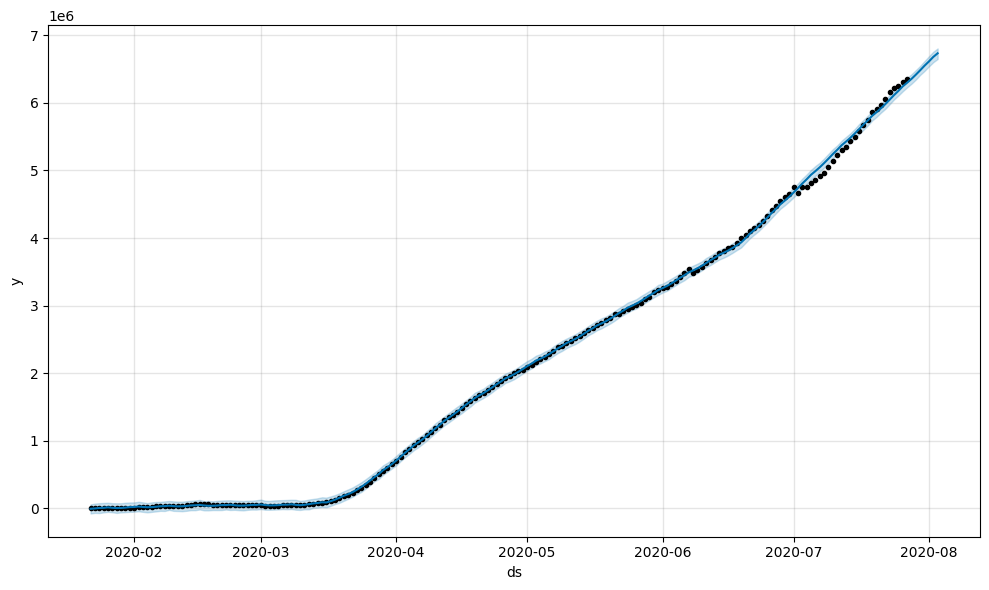

In [155]:
active_model_plot = active_model.plot(forecast)

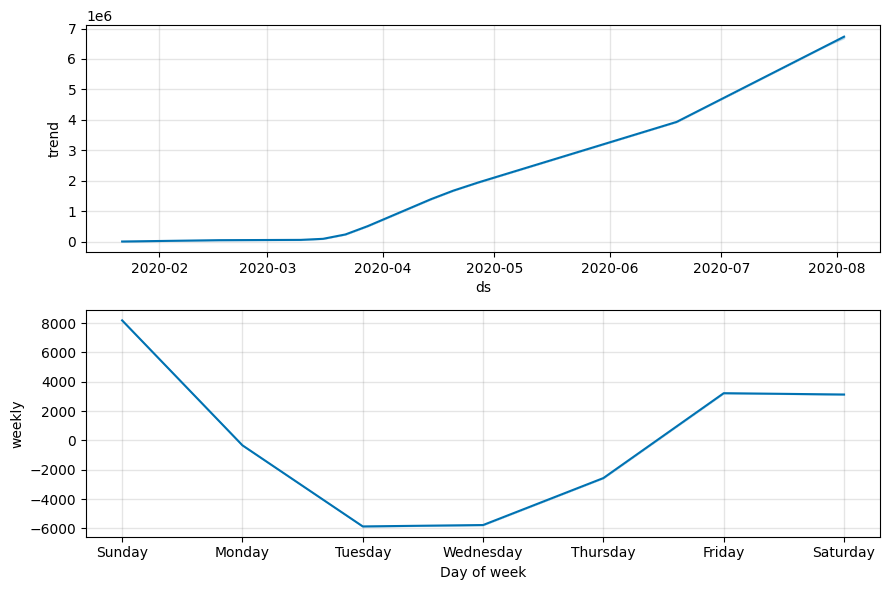

In [156]:
confirmed_forecast_plot1 = active_model.plot_components(forecast)